In [1]:
import pandas as pd
import numpy as np
import tellurium as te
from odbm.odbm import ModelBuilder
import matplotlib.pyplot as plt


In [2]:
model_species = pd.read_excel('model_definition.xlsx', sheet_name = 'Species & Base Mechanisms', engine = 'openpyxl')
model_rxns = pd.read_excel('model_definition.xlsx', sheet_name = 'Reaction', engine = 'openpyxl')

In [3]:
modelfile = 'new_model.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

model = open(modelfile,'r').read()
r  = te.loada(model)
r['[OXALOACETICACID]']=0
s = r.simulate(0,10)



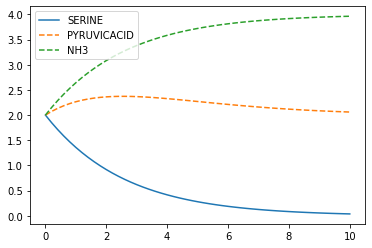

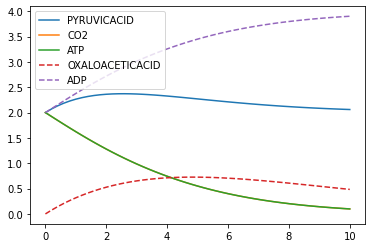

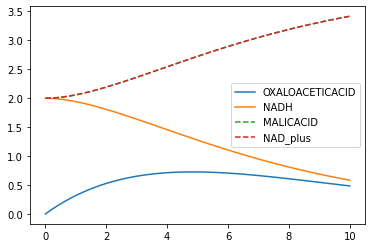

In [4]:
for k,r in model_rxns.iterrows():
    plt.figure()
    for j in myModel.get_substrates(k):
        plt.plot(s['time'],s['['+j+']'], label = j)
        
    for j in myModel.get_products(k):
        plt.plot(s['time'],s['['+j+']'],'--', label = j)  
    plt.legend()
